In [11]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
tensorflow: 1.1.0
matplotlib
numpy
"""

'\nKnow more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/\nMy Youtube Channel: https://www.youtube.com/user/MorvanZhou\nDependencies:\ntensorflow: 1.1.0\nmatplotlib\nnumpy\n'

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [3]:
tf.set_random_seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR = 0.002         # learning rate
N_TEST_IMG = 5

# Mnist digits
mnist = input_data.read_data_sets('datasets/MNIST_data/', one_hot=False)     # use not one-hotted target data
test_x = mnist.test.images[:200]
test_y = mnist.test.labels[:200]

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


(55000, 784)
(55000,)


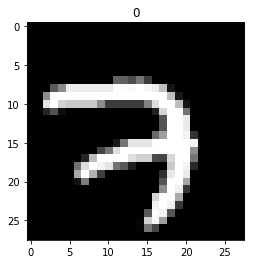

In [4]:
# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)     # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()

In [5]:
# tf placeholder
tf_x = tf.placeholder(tf.float32, [None, 28*28])    # value in the range of (0, 1)

In [6]:
# encoder
en0 = tf.layers.dense(tf_x, 128, tf.nn.tanh)
en1 = tf.layers.dense(en0, 64, tf.nn.tanh)
en2 = tf.layers.dense(en1, 12, tf.nn.tanh)
encoded = tf.layers.dense(en2, 3)

# decoder
de0 = tf.layers.dense(encoded, 12, tf.nn.tanh)
de1 = tf.layers.dense(de0, 64, tf.nn.tanh)
de2 = tf.layers.dense(de1, 128, tf.nn.tanh)
decoded = tf.layers.dense(de2, 28*28, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

In [8]:
# original data (first row) for viewing
view_data = mnist.test.images[:N_TEST_IMG]
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

In [9]:
for step in range(8000):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

    if step % 100 == 0:     # plotting
        print('train loss: %.4f' % loss_)
        # plotting decoded image (second row)
        decoded_data = sess.run(decoded, {tf_x: view_data})
        for i in range(N_TEST_IMG):
            a[1][i].clear()
            a[1][i].imshow(np.reshape(decoded_data[i], (28, 28)), cmap='gray')
            a[1][i].set_xticks(()); a[1][i].set_yticks(())
        plt.draw(); plt.pause(0.01)
plt.ioff()

train loss: 0.2325
train loss: 0.0698
train loss: 0.0707
train loss: 0.0672
train loss: 0.0684
train loss: 0.0694
train loss: 0.0628
train loss: 0.0618
train loss: 0.0571
train loss: 0.0530
train loss: 0.0515
train loss: 0.0512
train loss: 0.0429
train loss: 0.0456
train loss: 0.0452
train loss: 0.0438
train loss: 0.0458
train loss: 0.0435
train loss: 0.0459
train loss: 0.0443
train loss: 0.0399
train loss: 0.0403
train loss: 0.0417
train loss: 0.0445
train loss: 0.0375
train loss: 0.0407
train loss: 0.0416
train loss: 0.0414
train loss: 0.0438
train loss: 0.0444
train loss: 0.0409
train loss: 0.0402
train loss: 0.0424
train loss: 0.0432
train loss: 0.0370
train loss: 0.0413
train loss: 0.0428
train loss: 0.0413
train loss: 0.0422
train loss: 0.0369
train loss: 0.0412
train loss: 0.0380
train loss: 0.0394
train loss: 0.0406
train loss: 0.0427
train loss: 0.0410
train loss: 0.0383
train loss: 0.0400
train loss: 0.0414
train loss: 0.0412
train loss: 0.0390
train loss: 0.0397
train loss: 

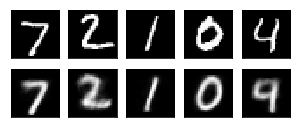

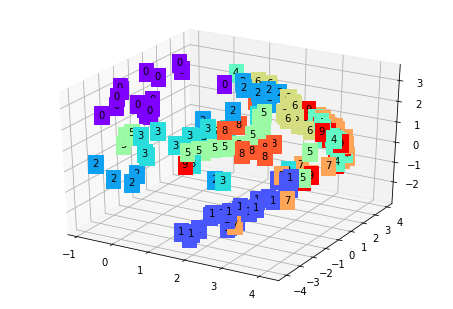

In [10]:
# visualize in 3D plot
view_data = test_x[:200]
encoded_data = sess.run(encoded, {tf_x: view_data})
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
for x, y, z, s in zip(X, Y, Z, test_y):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()